In [ ]:
%pylab inline

In [1]:
from skimage import segmentation, feature, filters, io, exposure, morphology
import cv2

In [2]:
fname = '15-07-31_M526-D3-4x4_PMT - PMT [PMT2] _C01_xyz Stage Z0006.ome.tif'
folder = 'MBT/180918_M526-D3-4x4_15-07-31'
img = io.imread(f'{folder}/{fname}')[50:250,50:250]
fig = figure(figsize=(10,10))
imshow(img,cmap='gray')
# xticks([]), yticks([]);
show()
hist(img.flatten(), bins=256);
show()

NameError: name 'figure' is not defined

float64 255.0 0.0


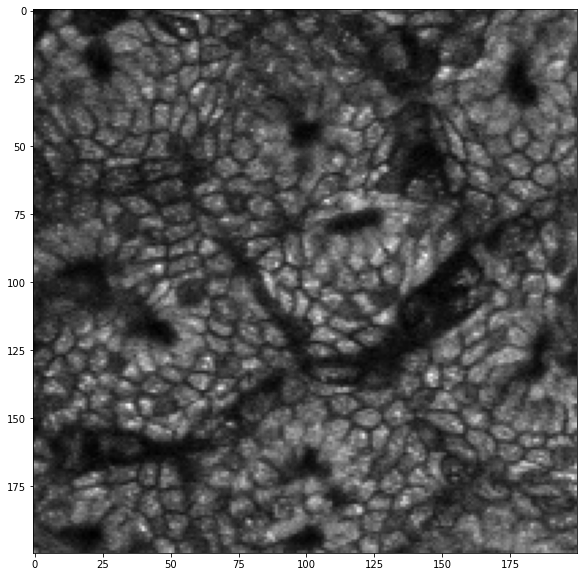

In [11]:
img = exposure.rescale_intensity(img, out_range=uint8).astype(float64)
print(img.dtype, img.max(), img.min())
fig = figure(figsize=(10,10))
imshow(img, cmap='gray')

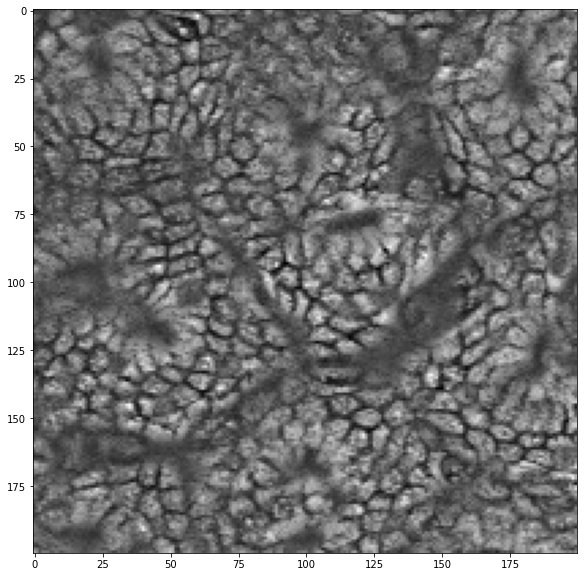

In [6]:
selem =  morphology.disk(3)
res = morphology.black_tophat(img, selem)
fig = figure(figsize=(10,10))
imshow(img-res, cmap='gray')

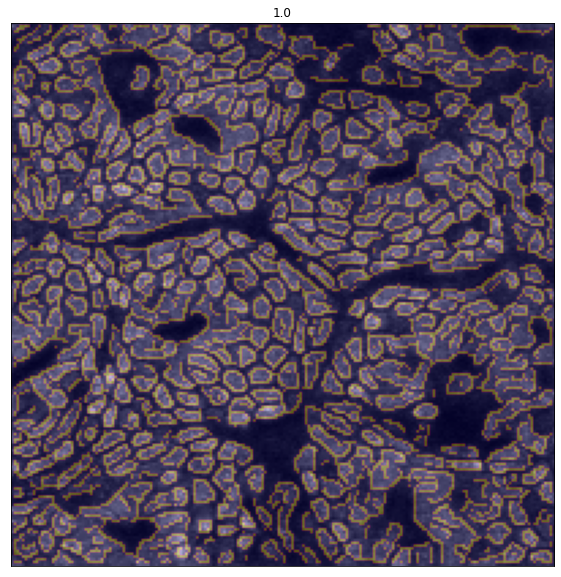

In [42]:
size = 10
for s in linspace(1,2,10):
    edges = feature.canny(img, sigma=s)
    fig = figure(figsize = (size, size))
    title(s)
    imshow(img, cmap='gray')
    imshow(edges, cmap='plasma', alpha=0.3)
    xticks([]), yticks([])
    # savefig(f'c{s:.1f}.png')
    show()
    break

In [66]:
img = expand_dims(img, axis=0).shape

In [69]:
nimg = array([img, img, img]).T
segments_quick = segmentation.slic(img,n_segments=250, compactness=5, sigma=1)
fig = figure(figsize=(10,10))
imshow(segmentation.mark_boundaries(nimg, segments_quick))

/opt/homebrew/anaconda3/envs/sci/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  


ValueError: not enough values to unpack (expected 3, got 1)

In [27]:
import numpy as np
import cv2 as cv
# img = cv.imread('home.jpg')
Z = img.flatten()
# convert to np.float32
Z = np.float32(Z)
# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 3
ret,label,center=cv.kmeans(Z,K,None,criteria,10,cv.KMEANS_PP_CENTERS)
# Now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img.shape))


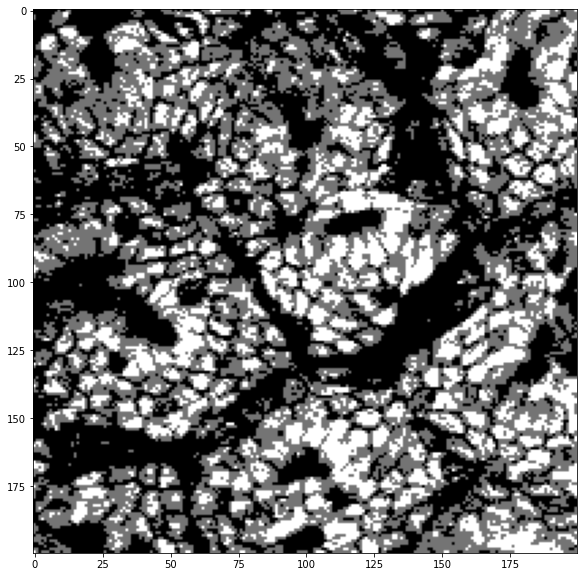

In [28]:
figure(figsize=(10,10))
imshow(res2, cmap='gray')